<h1>Analisis Data</h1>

Definisikan library yang dibutuhkan

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
plt.style.use('seaborn')
sns.set_style("darkgrid")
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

data yang digunakan berasal dari 
http://distan.jabarprov.go.id/distan/ 

Import data jagung

In [2]:
df_produksi = pd.read_csv('data_komoditas_jagung/distanhor-od_17190_produksi_jagung_berdasarkan_kabupatenkota_data.csv')
df_luas_area = pd.read_csv('data_komoditas_jagung/distanhor-od_17237_luas_areal_tanam_jagung_berdasarkan_kabupatenkota_data.csv')
df_luas_panen = pd.read_csv('data_komoditas_jagung/distanhor-od_17241_luas_panen_jagung_berdasarkan_kabupatenkota_data.csv')
df_produktivitas = pd.read_csv('data_komoditas_jagung/distanhor-od_17263_produktivitas_jagung_berdasarkan_kabupatenkota_data.csv')
df_produktivitas.head()

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,produktivitas_jagung,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,44.44,KUINTAL PER HEKTAR,2015
1,2,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,62.86,KUINTAL PER HEKTAR,2015
2,3,32,JAWA BARAT,3203,KABUPATEN CIANJUR,74.72,KUINTAL PER HEKTAR,2015
3,4,32,JAWA BARAT,3204,KABUPATEN BANDUNG,49.86,KUINTAL PER HEKTAR,2015
4,5,32,JAWA BARAT,3205,KABUPATEN GARUT,83.02,KUINTAL PER HEKTAR,2015


Menggabungkan data

In [3]:
data = pd.DataFrame()

data['tahun'] = df_produksi['tahun']
data['nama_kabupaten_kota'] = df_produksi['nama_kabupaten_kota']
data['luas_areal_tanam_hektar'] = df_luas_area['luas_areal_tanam']
data['luas_panen_jagung_hektar'] = df_luas_panen['luas_panen']
data['produktivitas_jagung'] = df_produktivitas[df_produktivitas['tahun']<2020]['produktivitas_jagung']
data['produksi_jagung'] = df_produksi['produksi_jagung']

data

,tahun,nama_kabupaten_kota,luas_areal_tanam_hektar,luas_panen_jagung_hektar,produktivitas_jagung,produksi_jagung
0,2015,KABUPATEN BOGOR,3097,9,44.44,40
1,2015,KABUPATEN SUKABUMI,8652,6164,62.86,38745
2,2015,KABUPATEN CIANJUR,5627,3812,74.72,28483
3,2015,KABUPATEN BANDUNG,8504,6634,49.86,33079
4,2015,KABUPATEN GARUT,69828,69460,83.02,576661
...,...,...,...,...,...,...
130,2019,KOTA BEKASI,18,19,0.00,90
131,2019,KOTA DEPOK,15,6,0.00,30
132,2019,KOTA CIMAHI,21,2,0.00,12
133,2019,KOTA TASIKMALAYA,57,62,0.00,254


Melihat nilai statistik Data

In [4]:
data.drop(['tahun'],axis=1).describe()

,luas_areal_tanam_hektar,luas_panen_jagung_hektar,produktivitas_jagung,produksi_jagung
count,135.000000,135.000000,135.000000,135.000000
mean,6976.829630,6473.148148,50.191556,50005.888889
std,15178.903337,15146.740995,30.017492,126649.341935
min,0.000000,0.000000,0.000000,0.000000
25%,32.000000,19.500000,36.645000,98.500000
50%,971.000000,431.000000,62.360000,2726.000000
75%,7397.000000,6575.500000,74.890000,42307.000000
max,86025.000000,85814.000000,89.580000,768744.000000


Backup Data

In [5]:
data_copy = data.copy()

Periksa info Data

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   tahun                     135 non-null    int64  
 1   nama_kabupaten_kota       135 non-null    object 
 2   luas_areal_tanam_hektar   135 non-null    int64  
 3   luas_panen_jagung_hektar  135 non-null    int64  
 4   produktivitas_jagung      135 non-null    float64
 5   produksi_jagung           135 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 6.5+ KB


Periksa nilai 0 dari Data

In [7]:
print((data['luas_panen_jagung_hektar'] == 0).sum())
print((data['luas_areal_tanam_hektar'] == 0).sum())
print((data['produktivitas_jagung'] == 0).sum())
print((data['produksi_jagung'] == 0).sum())

data[data['produktivitas_jagung'] == 0 ]

13
11
29
13


,tahun,nama_kabupaten_kota,luas_areal_tanam_hektar,luas_panen_jagung_hektar,produktivitas_jagung,produksi_jagung
20,2015,KOTA BANDUNG,0,0,0.0,0
23,2015,KOTA DEPOK,39,0,0.0,0
24,2015,KOTA CIMAHI,36,0,0.0,0
47,2016,KOTA BANDUNG,0,0,0.0,0
57,2017,KABUPATEN BANDUNG,20190,18774,0.0,142458
72,2017,KOTA BOGOR,55,0,0.0,0
73,2017,KOTA SUKABUMI,32,28,0.0,208
74,2017,KOTA BANDUNG,0,0,0.0,0
75,2017,KOTA CIREBON,0,0,0.0,0
76,2017,KOTA BEKASI,20,20,0.0,96


Hapus setiap data yang memiliki nilai 0 pada masing masing kolom

In [8]:
data = data[(data[['produksi_jagung','luas_areal_tanam_hektar','luas_panen_jagung_hektar','produktivitas_jagung']] != 0).all(axis=1)]
data

,tahun,nama_kabupaten_kota,luas_areal_tanam_hektar,luas_panen_jagung_hektar,produktivitas_jagung,produksi_jagung
0,2015,KABUPATEN BOGOR,3097,9,44.44,40
1,2015,KABUPATEN SUKABUMI,8652,6164,62.86,38745
2,2015,KABUPATEN CIANJUR,5627,3812,74.72,28483
3,2015,KABUPATEN BANDUNG,8504,6634,49.86,33079
4,2015,KABUPATEN GARUT,69828,69460,83.02,576661
...,...,...,...,...,...,...
122,2019,KABUPATEN KARAWANG,447,421,64.57,2718
123,2019,KABUPATEN BEKASI,2,2,60.00,9
124,2019,KABUPATEN BANDUNG BARAT,5369,5323,49.39,26291
125,2019,KABUPATEN PANGANDARAN,591,589,66.13,3894


Melihat Visualisasi Data

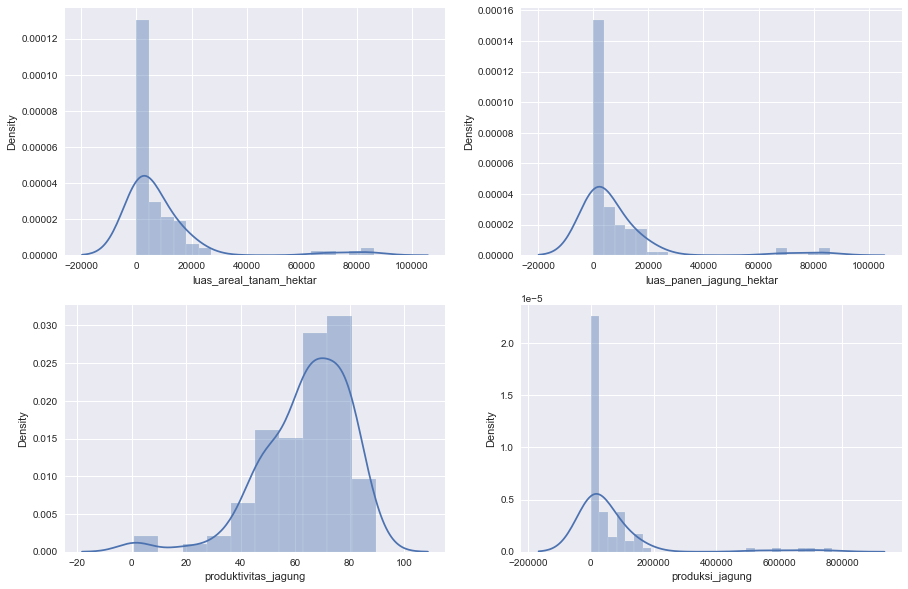

In [9]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.distplot(data['luas_areal_tanam_hektar'])
plt.subplot(2,2,2)
sns.distplot(data['luas_panen_jagung_hektar'])
plt.subplot(2,2,3)
sns.distplot(data['produktivitas_jagung'])
plt.subplot(2,2,4)
sns.distplot(data['produksi_jagung'])
plt.show()

Melihat pairplot berdasarkan Produksi jagung

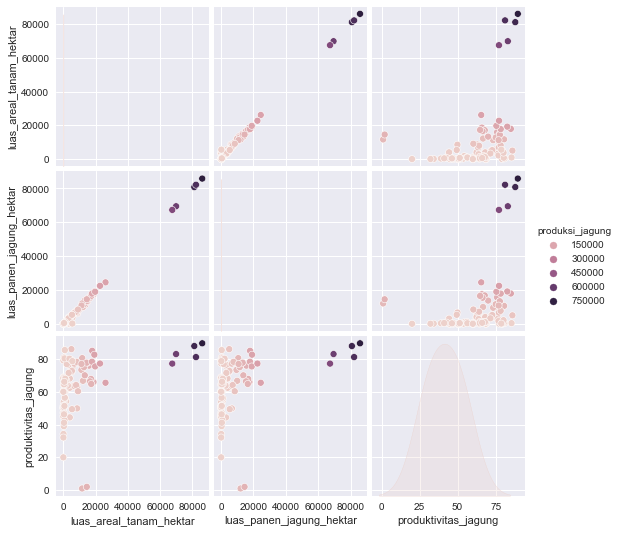

In [10]:
sns.pairplot(data[[
    'luas_areal_tanam_hektar',
    'luas_panen_jagung_hektar',
    'produktivitas_jagung','produksi_jagung']]
             ,hue='produksi_jagung'
             ,kind='scatter')
plt.show()

Melihat informasi rata-rata dan median dari masing masing kabupaten selama 5 tahun terakhir

In [11]:
gb = data.iloc[:,1:].groupby(by='nama_kabupaten_kota').agg([np.mean,np.median])
gb

luas_areal_tanam_hektar           \
                                           mean   median   
nama_kabupaten_kota                                        
KABUPATEN BANDUNG                       12027.0  12543.0   
KABUPATEN BANDUNG BARAT                  5066.2   5087.0   
KABUPATEN BEKASI                           10.0      8.0   
KABUPATEN BOGOR                          1161.8    800.0   
KABUPATEN CIAMIS                         4851.6   4997.0   
KABUPATEN CIANJUR                        9137.6   8188.0   
KABUPATEN CIREBON                        4541.6   4430.0   
KABUPATEN GARUT                         77318.4  81116.0   
KABUPATEN INDRAMAYU                      4275.4   2140.0   
KABUPATEN KARAWANG                        575.0    447.0   
KABUPATEN KUNINGAN                       2941.6   3163.0   
KABUPATEN MAJALENGKA                    18092.8  17887.0   
KABUPATEN PANGANDARAN                     938.4   1055.0   
KABUPATEN PURWAKARTA                     1582.8   1353.0   
KABUPATEN SUBANG                          568.4    574.0   
KABUPATEN SUKABUMI                      16422.8  16519.0   
KABUPATEN SUMEDANG                      13921.8  11699.0   
KABUPATEN TASIKMALAYA                   12663.4  13284.0   
KOTA BANJAR                               312.2    317.0   
KOTA BEKASI                                34.5     34.5   
KOTA BOGOR                                171.0    171.0   
KOTA CIMAHI                                22.0     22.0   
KOTA CIREBON                                1.0      1.0   
KOTA DEPOK                                 35.0     35.0   
KOTA SUKABUMI                              38.0     38.0   
KOTA TASIKMALAYA                          248.0    248.0   

                        luas_panen_jagung_hektar           \
                                            mean   median   
nama_kabupaten_kota                                         
KABUPATEN BANDUNG                       11050.25  11544.5   
KABUPATEN BANDUNG BARAT                  4751.20   4837.0   
KABUPATEN BEKASI                            4.40      3.0   
KABUPATEN BOGOR                           252.80    240.0   
KABUPATEN CIAMIS                         4866.80   4992.0   
KABUPATEN CIANJUR                        8025.20   7643.0   
KABUPATEN CIREBON                         170.60    135.0   
KABUPATEN GARUT                         77105.20  80799.0   
KABUPATEN INDRAMAYU                      3481.80   1610.0   
KABUPATEN KARAWANG                        420.00    353.0   
KABUPATEN KUNINGAN                       2867.20   3073.0   
KABUPATEN MAJALENGKA                    17864.40  17888.0   
KABUPATEN PANGANDARAN                     757.20    962.0   
KABUPATEN PURWAKARTA                      963.80   1017.0   
KABUPATEN SUBANG                          199.40    115.0   
KABUPATEN SUKABUMI                      14685.60  15384.0   
KABUPATEN SUMEDANG                      12961.80  10786.0   
KABUPATEN TASIKMALAYA                   12282.00  13718.0   
KOTA BANJAR                               312.20    309.0   
KOTA BEKASI                                30.00     30.0   
KOTA BOGOR                                 12.00     12.0   
KOTA CIMAHI                                 1.00      1.0   
KOTA CIREBON                                1.00      1.0   
KOTA DEPOK                                  2.00      2.0   
KOTA SUKABUMI                              35.00     35.0   
KOTA TASIKMALAYA                          245.00    245.0   

                        produktivitas_jagung         produksi_jagung            
                                        mean  median            mean    median  
nama_kabupaten_kota                                                             
KABUPATEN BANDUNG                     32.615  25.930        76762.75   84675.0  
KABUPATEN BANDUNG BARAT               62.228  68.120        30499.40   26978.0  
KABUPATEN BEKASI                      61.666  60.000           27.80      18.0  
KABUPATEN BOGOR            

Melihat luas area dan area panen jagung pada setiap daerah

melakukan scaling pada setiap fitur 

In [12]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler(feature_range=(0,1))

luas_areal_tanam_hektar_scaled = min_max_scaler.fit_transform(
    gb['luas_areal_tanam_hektar']['mean'].values.reshape(-1,1))

luas_panen_jagung_hektar_scaled = min_max_scaler.fit_transform(
    gb['luas_panen_jagung_hektar']['mean'].values.reshape(-1,1))

produktivitas_jagung_scaled = min_max_scaler.fit_transform(
    gb['produktivitas_jagung']['mean'].values.reshape(-1,1))

produksi_jagung_scaled = min_max_scaler.fit_transform(
    gb['produksi_jagung']['mean'].values.reshape(-1,1))

visualisasi fitur

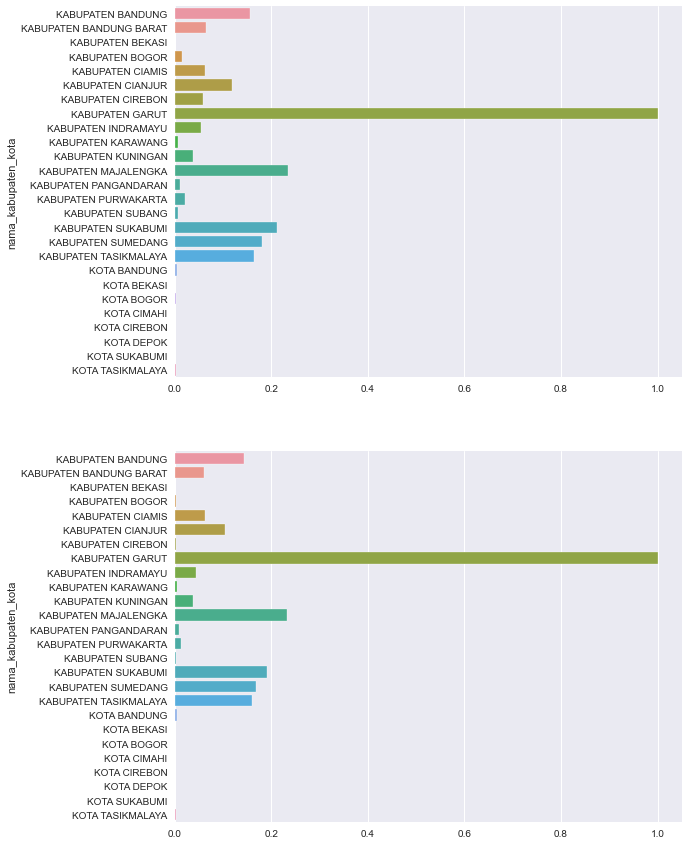

In [13]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
sns.barplot(x= luas_areal_tanam_hektar_scaled.reshape(26), 
            y=data_copy['nama_kabupaten_kota'][0:26].sort_values())
plt.subplot(2,2,3)
sns.barplot(x= luas_panen_jagung_hektar_scaled.reshape(26),
            y=data_copy['nama_kabupaten_kota'][0:26].sort_values())
plt.show()

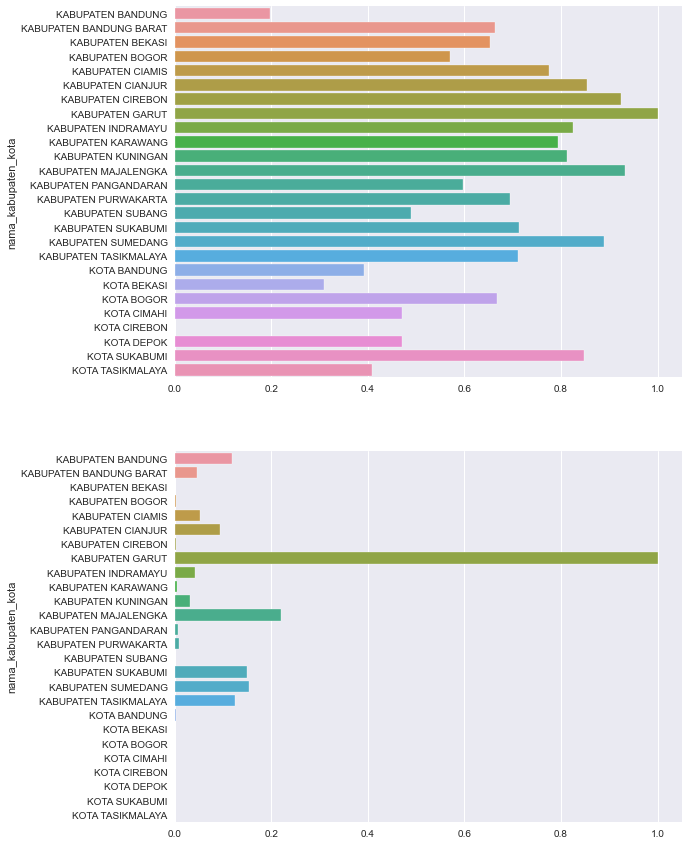

In [14]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
sns.barplot(x= produktivitas_jagung_scaled.reshape(26), 
            y=data_copy['nama_kabupaten_kota'][0:26].sort_values())
plt.subplot(2,2,3)
sns.barplot(x= produksi_jagung_scaled.reshape(26), 
            y=data_copy['nama_kabupaten_kota'][0:26].sort_values())
plt.show()

- sedikit kesimpulan bahwa terlihat dari daerah Kabupaten memiliki lahan yang lebih luas dibandingkan daerah kota
- karena luas lahan sedikit maka berbanding lurus dengan hasil produksi jagung dimana daerah kabupaten lebih banyak menghasilkan jagung daripada daerah kota

Melihat korelasi  fitur

In [15]:
df_analisis = data[
    ['luas_areal_tanam_hektar',
    'luas_panen_jagung_hektar',
    'produktivitas_jagung',
    #'produksi_jagung'
    ]]

# df_analisis.corr()

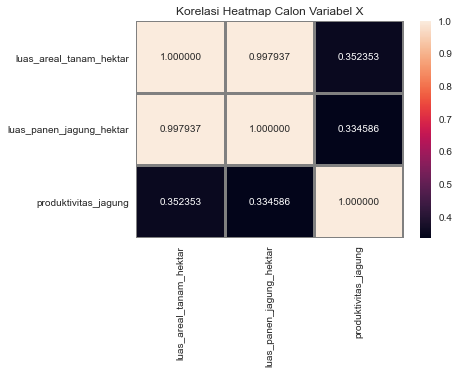

In [16]:
sns.heatmap(df_analisis.corr(),annot=True,fmt="f",linewidths=2,linecolor='grey').set_title("Korelasi Heatmap Calon Variabel X")
plt.show()

- korelasi antara luas_areal_tanam_hektar dan luas_panen_jagung_hektar memiliki korelasi yang tinggi
- korelasi luas_areal_tanam_hektar dan luas_panen_jagung_hektar memiliki korelasi paling rendah dengan produktivitas_jagung

<h1>Pemodelan</h1>

Mendefinisikan variabel x dan y

In [29]:
x = data[['luas_areal_tanam_hektar','luas_panen_jagung_hektar','produktivitas_jagung']].values.reshape(-1,3)
y = data['produksi_jagung'].values.reshape(-1,1)

Memisahkan data latih dan data uji

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.2, random_state=100)

Membuat model regresi dan melatih data dengan DecisionTreeRegressor

In [31]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()

# fit data latih pada model
regressor.fit(x_train, y_train)

DecisionTreeRegressor()

Melihat score dengan cross_val_score

In [50]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(regressor, x, y)
print(score)
np.mean(score)

[0.97190247 0.978674   0.99462733 0.99379906 0.98585444]


0.9849714607886998

In [45]:
# melihat score yang didapat 
regressor.score(x_test,y_test)

0.9768626491147637

Hasil perbandingan prediksi dan data sebenarnya

In [22]:
y_pred = regressor.predict(x_test)
result = pd.DataFrame({
    'prediction': y_pred.reshape(21),
    'true':y_test.reshape(21)
}).astype(int)

result

,prediction,true
0,5788,6437
1,106617,113572
2,609,590
3,666963,768744
4,59828,63752
5,2998,2856
6,33079,45695
7,28483,26978
8,160393,115257
9,28483,25416


Menghitung nilai Error

In [23]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Absolute Percentage Error:', metrics.mean_absolute_percentage_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 11907.0
Mean Absolute Percentage Error: 0.12087613514624516
Mean Squared Error: 668217861.5714285
Root Mean Squared Error: 25849.910281690118


Melihat representasi setiap fitur pada tree 

In [24]:
from sklearn import tree
text_representation = tree.export_text(regressor)
print(text_representation)

|--- feature_1 <= 45888.50
|   |--- feature_1 <= 7138.50
|   |   |--- feature_1 <= 3059.50
|   |   |   |--- feature_1 <= 1376.50
|   |   |   |   |--- feature_1 <= 531.00
|   |   |   |   |   |--- feature_1 <= 192.00
|   |   |   |   |   |   |--- feature_1 <= 71.00
|   |   |   |   |   |   |   |--- feature_1 <= 39.50
|   |   |   |   |   |   |   |   |--- feature_1 <= 14.00
|   |   |   |   |   |   |   |   |   |--- feature_1 <= 6.00
|   |   |   |   |   |   |   |   |   |   |--- feature_1 <= 2.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |   |   |   |   |   |   |   |--- feature_1 >  2.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |--- feature_1 >  6.00
|   |   |   |   |   |   |   |   |   |   |--- feature_2 <= 64.55
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |   |--- feature_2 >  64.55
|   |   |   |   |   |   | 

Visualisasi Model pada seluruh data variabel luas area

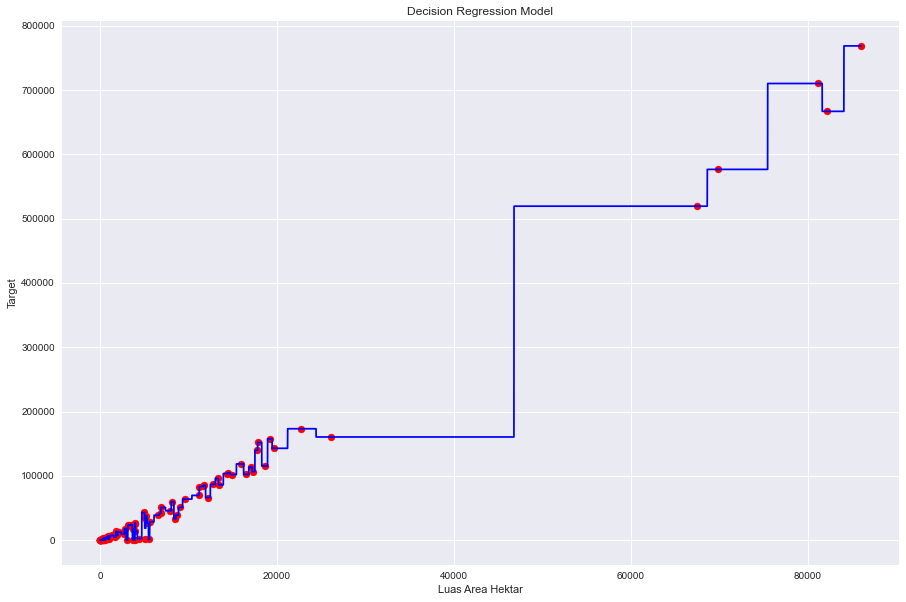

In [25]:
regressor_contoh = DecisionTreeRegressor()

regressor_contoh.fit(data[['luas_areal_tanam_hektar']].values,data['produksi_jagung'].values)


plt.figure(figsize=(15,10))
X_grid = np.arange(min(data['luas_areal_tanam_hektar'].values), max(data['luas_areal_tanam_hektar'].values), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(data['luas_areal_tanam_hektar'].values, data['produksi_jagung'].values, color = 'red')
plt.plot(X_grid, regressor_contoh.predict(X_grid), color = 'blue')
plt.title('Decision Regression Model')
plt.xlabel('Luas Area Hektar')
plt.ylabel('Target')
plt.show()

Visualisasi prediksi dan target pada variabel luas area

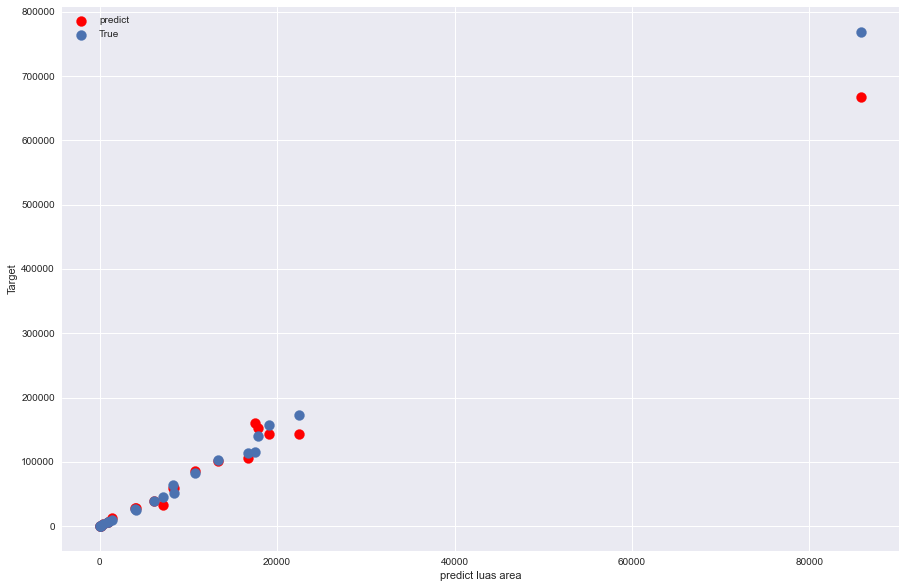

In [26]:
plt.figure(figsize=(15,10))
plt.scatter(x_test[:,1],y_pred,s=100, color='r',label='predict')
plt.scatter(x_test[:,1],y_test,s=100,label='True')
plt.ylabel('Target')
plt.xlabel('predict luas area')
plt.legend()
plt.show()

Mencoba Prediksi dengan model

In [27]:

luas_area = 18
luas_panen = 19
produktivitas = 20
val = regressor.predict(np.array([luas_area,luas_panen,produktivitas]).reshape(-1,3))
print("Prediksi :")

pd.DataFrame({
    'luas_areal_tanam_hektar':luas_area,
    'luas_panen_jagung_hektar':luas_panen,
    'produktivitas_jagung':produktivitas,
    'Prediksi':val})



Prediksi :


,luas_areal_tanam_hektar,luas_panen_jagung_hektar,produktivitas_jagung,Prediksi
0,18,19,20,106.0
